In [5]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2
%matplotlib inline

from compas_surrogate.cosmic_integration.universe import Universe
#
# PATH = "/Users/avaj0001/Documents/projects/compas_dev/quasir_compass_blocks/data/COMPAS_Output.h5"
#
# # uni1 = Universe.from_compas_h5(PATH, SF=[0.01, 2.77, 2.90, 4.70])
# # fig = uni1.plot_detection_rate_matrix()
#
#
#


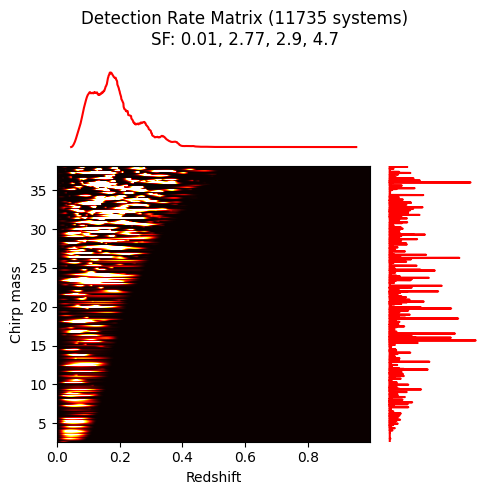

In [5]:
fig = uni1.plot_detection_rate_matrix()

In [4]:
uni = Universe.from_compas_h5(PATH, SF=[0.01, 2.77, 2.90, 4.70])

Average_SF_mass_needed =  508239458.7705817 solMass
Time taken for CI:  15.796096086502075


(11735, 1000) -> (50, 1000)


ValueError: x and y must have same first dimension, but have shapes (1000,) and (50,)

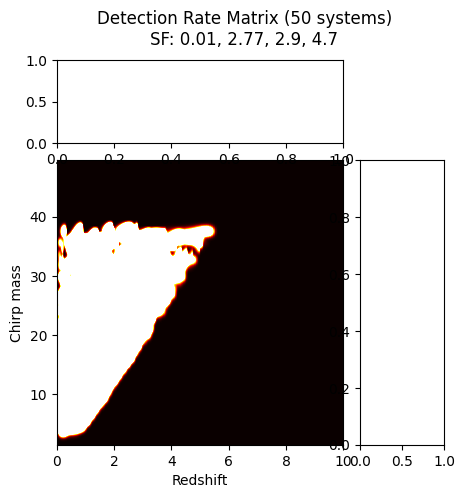

In [25]:
uni = uni1.bin_detection_rate()
fig = uni.plot_detection_rate_matrix()


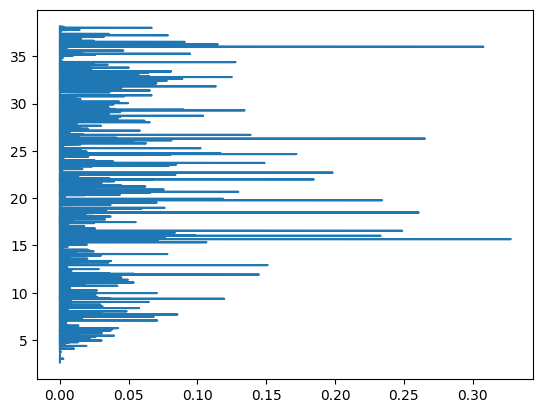

In [5]:
plt.plot(np.sum(uni.detection_rate, axis=1), uni.dco_chirp_masses)

In [2]:
uni.log_likelihood(data=uni.detection_rate)

NameError: name 'detections' is not defined

In [9]:
np.geomspace(1, 40, 10)

array([ 1.        ,  1.50663019,  2.26993453,  3.41995189,  5.15260277,
        7.76306689, 11.69607095, 17.62165361, 26.54931532, 40.        ])

Average_SF_mass_needed =  510688632.3708824 solMass
Time taken for CI:  17.464699268341064


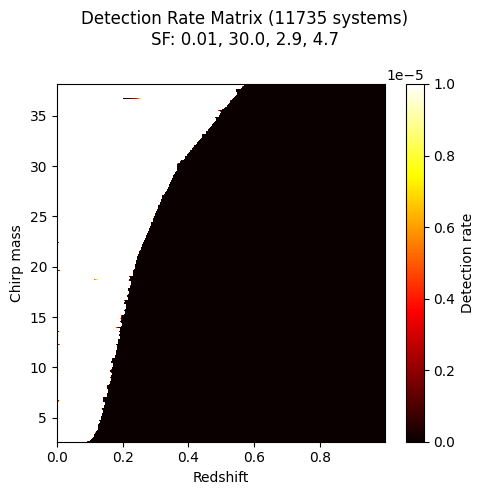

In [3]:
uni = Universe.from_compas_h5(PATH, SF=[0.01, 30, 2.90, 4.70])
fig = uni.plot_detection_rate_matrix()

Average_SF_mass_needed =  510248396.48078674 solMass
Time taken for CI:  16.088158130645752


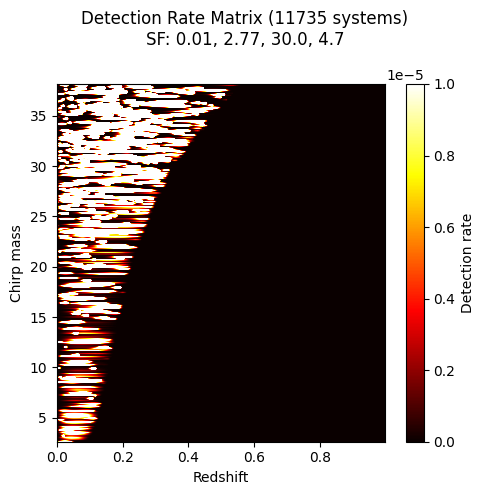

In [4]:
uni = Universe.from_compas_h5(PATH, SF=[0.01, 2.77, 30, 4.70])
fig = uni.plot_detection_rate_matrix()

Average_SF_mass_needed =  510612370.70621324 solMass
Time taken for CI:  16.194769859313965


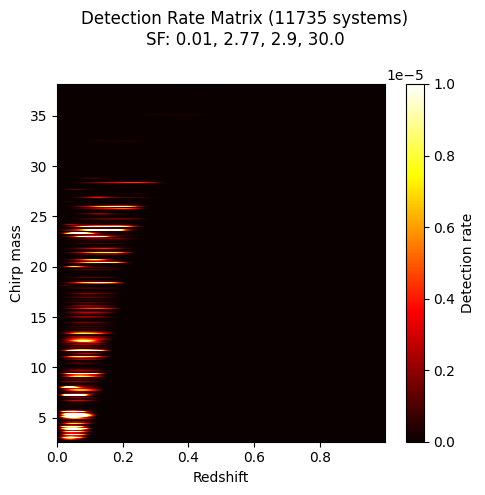

In [6]:
uni = Universe.from_compas_h5(PATH, SF=[0.01, 2.77, 2.90, 30])
fig = uni.plot_detection_rate_matrix()

Average_SF_mass_needed =  509230873.845371 solMass
Time taken for CI:  16.583844900131226


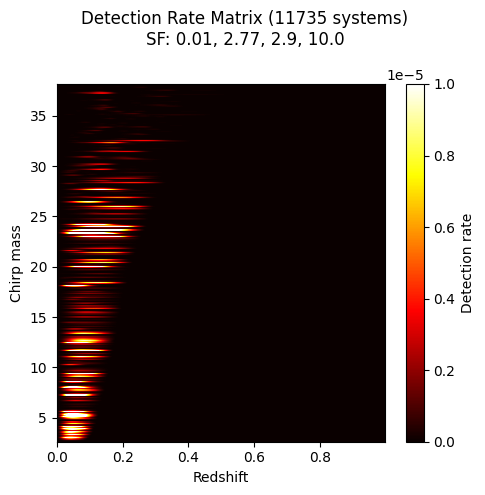

In [18]:
uni = Universe.from_compas_h5(PATH, SF=[0.01, 2.77, 2.90, 10])
fig = uni.plot_detection_rate_matrix()


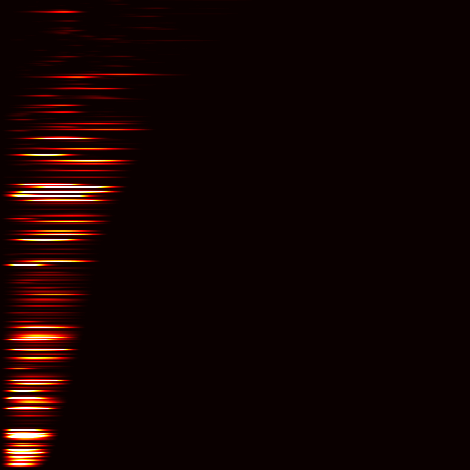

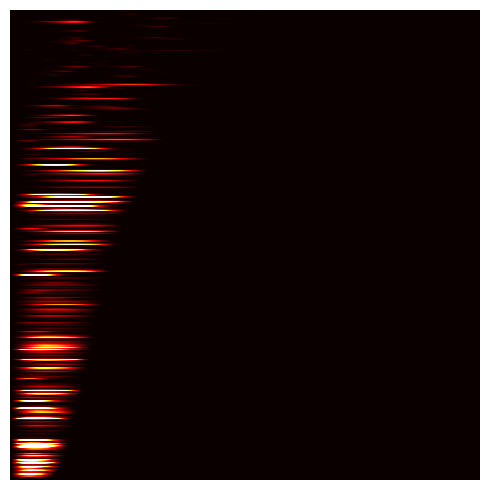

In [54]:
fig = uni.plot_detection_rate_matrix(interactive=True)
fig


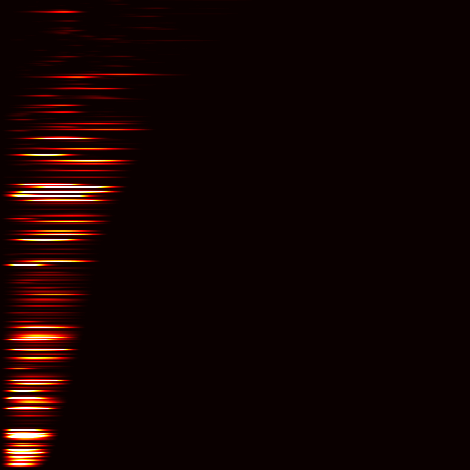

In [51]:
import logging
import time
from argparse import Namespace
from functools import cached_property

from typing import Dict, List, Optional, Tuple, Union
import plotly.express as px
import plotly.graph_objects as go
from skimage import io
import os
import matplotlib.pyplot as plt
import numpy as np
from astropy import units

f = "/Users/avaj0001/Documents/projects/compas_dev/compas_ml_surrogate/studies/.temp/uni_dco_n11735_sf_0.01_2.77_2.9_10.0_det_matrix.png"
im_data = io.imread(f)
fig = px.imshow(im_data,
                #          x=uni.redshifts,

                aspect='equal',
                width=400,
                height=400
                )
fig

fig.update_xaxes(showticklabels=False).update_yaxes(showticklabels=False)


Text(0, 0.5, 'Chirp Mass')

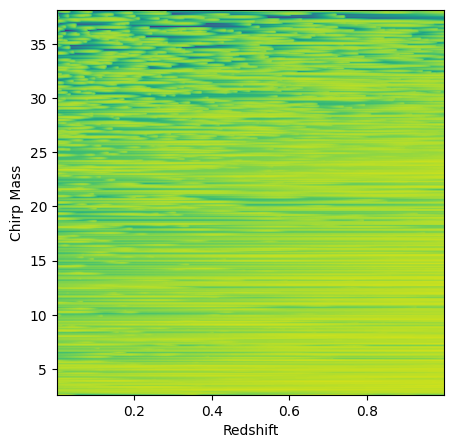

In [426]:
plt.figure(figsize=(5, 5))

low_mc, high_mc = np.min(mc), np.max(mc)
low_z, high_z = np.min(redshifts), np.max(redshifts)
# norm = mpl.colors.Normalize(vmin=np.exp(-100), vmax=np.exp(-12))
plt.imshow(merger_rate[sort_idx, 0:1000], norm='log', aspect='auto', interpolation='gaussian', origin='lower',
           extent=[low_z, high_z, low_mc, high_mc])
plt.xlabel("Redshift")
plt.ylabel("Chirp Mass")

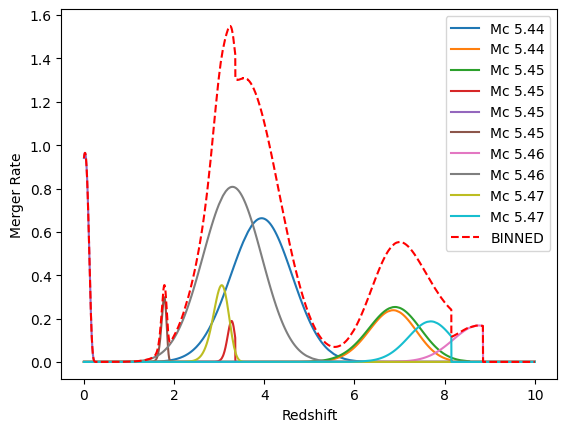

In [440]:

sorted_mr = merger_rate[sort_idx]
sorted_mc = mc[sort_idx]
for i in range(500, 510):
    plt.plot(uni.redshifts, sorted_mr[i], label=f"Mc {sorted_mc[i]:.2f}")
plt.plot(uni.redshifts, np.sum(sorted_mr[500:510, :], axis=0), label="BINNED", color='red', ls="--")
plt.xlabel("Redshift")
plt.ylabel("Merger Rate")
plt.legend()

  0%|          | 0/11735 [00:00<?, ?it/s]

(0.0, 1.0)

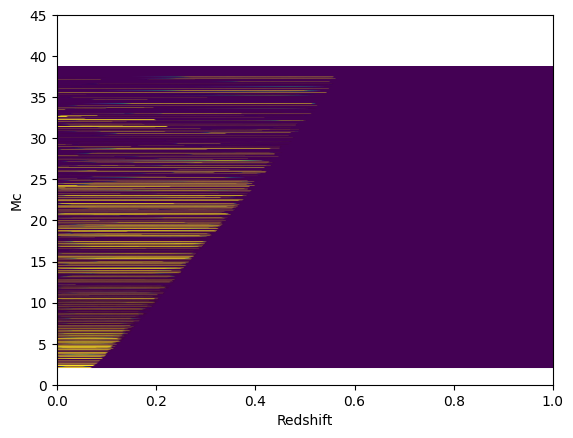

In [374]:
import matplotlib as mpl

plt.figure()

norm = mpl.colors.Normalize(vmin=np.exp(-80), vmax=np.exp(-40))

for i in tqdm(np.argsort(mc)):
    x = redshifts
    y = [mc[i] for _ in range(len(x))]
    z = list(detection_rate[i, :])
    plt.scatter(x, y, c=z, norm=norm)
plt.ylabel("Mc")
plt.xlabel("Redshift")
plt.ylim(0, 45)
plt.xlim(0, 1)

/var/folders/qt/rxjvm_j566v9qn7g754s1v9hzb3p7f/T/ipykernel_35463/2662532800.py:1: RuntimeWarning: divide by zero encountered in log
  x = np.log(detection_rate.ravel())


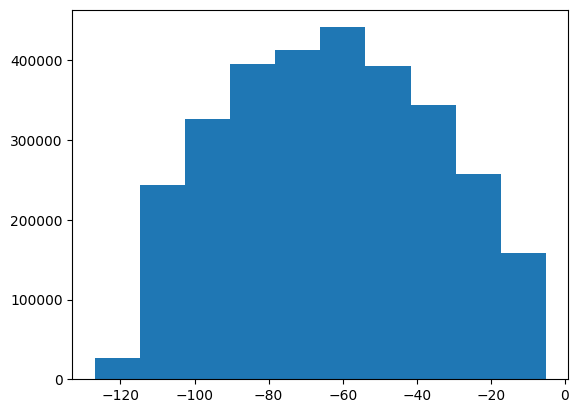

In [237]:
x = np.log(detection_rate.ravel())
x = x[x > -10000]

_ = plt.hist(x)

In [346]:
mc = np.sort(mc)

array([ 2.62493162,  2.63340936,  2.70996412, ..., 38.15917849,
       38.16024936, 38.16060978])

  0%|          | 0/80 [00:00<?, ?it/s]

(0.0, 1.0)

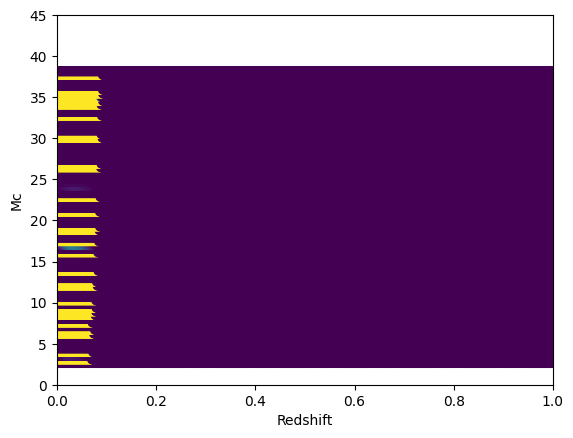

In [388]:


for i, bi in tqdm(enumerate(bins), total=len(bins)):
    x = redshifts
    y = [bi for _ in range(len(x))]
    z = list(binned_rates[i, :])
    plt.scatter(x, y, c=z, norm=norm)
plt.ylabel("Mc")
plt.xlabel("Redshift")
plt.ylim(0, 45)
plt.xlim(0, 1)

# plt.figure(figsize=(5,5))
#
# low_mc, high_mc = np.min(bins), np.max(bins)
# low_z, high_z = np.min(redshifts), np.max(redshifts)
# # norm = mpl.colors.Normalize(vmin=np.exp(-100), vmax=np.exp(-12))
# plt.imshow(binned_rates, cmap=plt.cm.hot, norm='linear', vmin=1e-40, vmax=1e-5, aspect='auto', interpolation='gaussian',  origin='lower', extent=[ low_z, high_z, low_mc, high_mc])

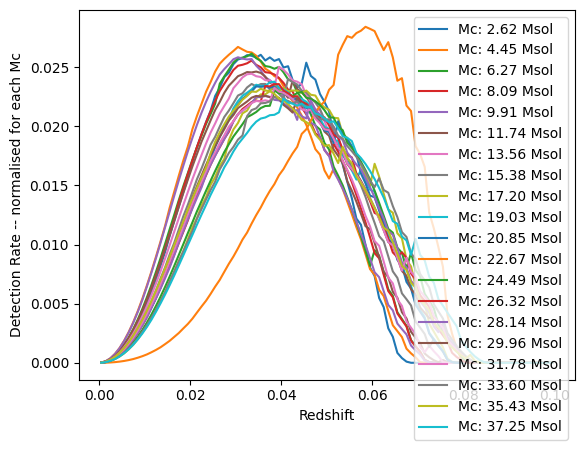

In [410]:
num_bins = 40
bins = np.linspace(low_mc, high_mc, num_bins)
mc_bins = np.digitize(mc[sort_idx], bins)
binned_rates = np.zeros((num_bins, len(z)))
sorted_dr = detection_rate[sort_idx, :]

for bii in range(1, num_bins + 1):
    mask = mc_bins[mc_bins == bii]
    binned_rates[bii - 1] = np.sum(sorted_dr[mask], axis=0)

plt.figure()
for i in range(0, len(bins), 2):
    y = binned_rates[i, :] / np.sum(binned_rates[i, :])
    # y  = binned_rates[i, :]
    plt.plot(redshifts[0:100], y[0:100], label=f"Mc: {bins[i]:.2f} Msol")
plt.ylabel("Detection Rate -- normalised for each Mc")
plt.xlabel("Redshift")
plt.legend()
plt.show()

In [ ]:
# if num_chirp_mass_bins is not None:
#     # get midpoints of chirp mass bins
#     mc_bins = np.linspace(mc.min(), mc.max(), num_chirp_mass_bins + 1)
#     mc = 0.5 * (mc_bins[1:] + mc_bins[:-1])
#     # sum over chirp mass bins
#     detections = np.sum(detections.reshape(len(mc_bins) - 1, -1), axis=0)
#     detections = detections.reshape(1, -1)
#


1 BIN [2.62, 3.07]: 14 (2.6249316169408274, 3.032845517869696)
2 BIN [3.07, 3.52]: 29 (3.098159592924743, 3.5213533510462045)
3 BIN [3.52, 3.97]: 44 (3.5307126649734903, 3.960305867386825)
4 BIN [3.97, 4.42]: 73 (3.9859494532496447, 4.422050881769983)
5 BIN [4.42, 4.87]: 120 (4.433477793072892, 4.8711136059397235)
6 BIN [4.87, 5.32]: 163 (4.880160148363969, 5.320852039368593)
7 BIN [5.32, 5.77]: 243 (5.323857379773302, 5.769475835438931)
8 BIN [5.77, 6.22]: 290 (5.7756145995815515, 6.221860411149769)
9 BIN [6.22, 6.67]: 291 (6.22468307380681, 6.673057410151789)
10 BIN [6.67, 7.12]: 307 (6.675040890669942, 7.122659418461099)
11 BIN [7.12, 7.57]: 317 (7.126388335266259, 7.57154993284076)
12 BIN [7.57, 8.02]: 336 (7.575416441376922, 8.020754705879831)
13 BIN [8.02, 8.47]: 363 (8.023095141824715, 8.470857728425367)
14 BIN [8.47, 8.92]: 356 (8.48378240120385, 8.922008932644362)
15 BIN [8.92, 9.37]: 319 (8.92466232751356, 9.368556833201357)
16 BIN [9.37, 9.82]: 335 (9.37253474599411, 9.81979

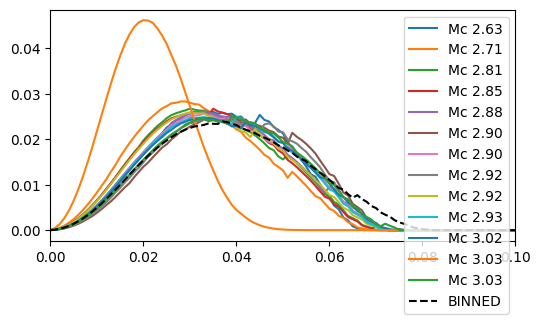

In [108]:
self = uni
z = self.redshifts[self.redshifts < self.max_detectable_redshift]
mc = self.dco_chirp_masses
detections = self.detection_rate

binned_rates, binned_mc, bins = uni.bin_data(detections, num_bins=80)

test_bin = 1
bin_mask = (bins[test_bin - 1] < mc) * (mc < bins[test_bin])

masked_mc = mc[bin_mask]
masked_det = detections[bin_mask]

plt.figure(figsize=(6, 3))
for mc_i, mask_d in zip(masked_mc, masked_det):
    plt.plot(z, mask_d / np.sum(mask_d), label=f"Mc {mc_i:.2f}")
plt.plot(z, binned_rates[test_bin] / np.sum(binned_rates[test_bin]), label="BINNED", color='k', ls='--')
plt.xlim(0, 0.1)
plt.legend()


In [102]:
x = np.array([1, 2, 3, 4, -1, -1, -1, 2])
(x < 3) * (x > 0)

array([ True,  True, False, False, False, False, False,  True])

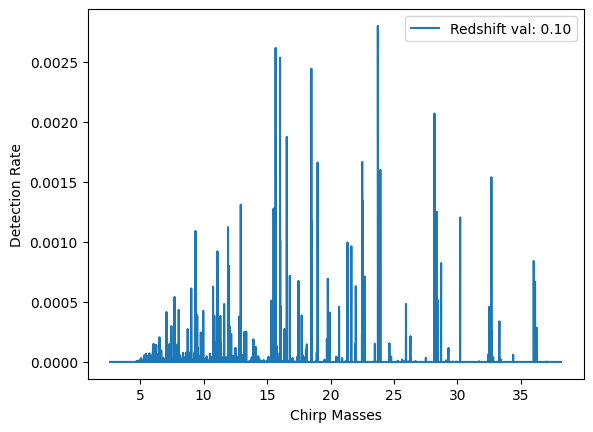

In [110]:
redshift_idx = 100
plt.plot(mc, detections[:, redshift_idx], label=f"Redshift val: {z[redshift_idx]:.2f}")
plt.xlabel("Chirp Masses")
plt.ylabel("Detection Rate")
plt.legend()


In [2]:
from glob import glob
from tqdm.auto import tqdm
from compas_surrogate.cosmic_integration.universe import Universe

npz_files = glob("out_muz_sigma0/*.npz")
uni = [Universe.from_npz(f) for f in tqdm(npz_files)]

uni[0].__dict__()

  0%|          | 0/10 [00:00<?, ?it/s]

{'compas_h5_path': array('../../quasir_compass_blocks/data/COMPAS_Output.h5', dtype='<U49'),
 'n_systems': array(11735),
 'detection_rate': array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [7.05274161e-050, 5.06825736e-049, 1.37470092e-048, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        ...,
        [7.45437009e-102, 7.79577860e-101, 3.25831200e-100, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
         0.00000000e+000, 0.00000000e+000, 0.00000000e+000]]),
 'redshifts': array([0.003, 0.009, 0.015, 0.021, 0.027, 0.033, 0.039, 0.045, 0.051,
      

In [3]:
uni[0].__dict__().keys()

dict_keys(['compas_h5_path', 'n_systems', 'detection_rate', 'redshifts', 'chirp_masses', 'SF', 'muz', 'sigma0'])

In [11]:
import h5py
from compas_surrogate.logger import logger
import numpy as np
import glob
from tqdm import tqdm
from compas_surrogate.cosmic_integration.universe import Universe

def compile_matricies_into_hdf(npz_regex, fname="detection_matricies.h5") -> None:
    """
    Compile a set of COMPAS detection rate matricies into a single hdf file
    :param npz_paths: list of paths to npz files
    :param fname: name of output file
    :return: None
    """
    npz_files = glob.glob(npz_regex)
    n = len(npz_files)
    logger.info(f"Compiling {n} matricies into hdf file --> {fname}")

    base_uni = Universe.from_npz(npz_files[0])

    with h5py.File(fname, "w") as f:
        f.attrs['compas_h5_path'] = str(base_uni.compas_h5_path)
        f.attrs['n_systems'] = base_uni.n_systems
        f.attrs['redshifts'] = base_uni.redshifts
        f.attrs['chirp_masses'] = base_uni.chirp_masses
        f.attrs['parameter_labels'] = base_uni.param_names
        f.create_dataset("detection_rates", (n, *base_uni.detection_rate.shape))
        f.create_dataset("parameters", (n, *base_uni.param_list.shape))
        for i in tqdm(range(n), "Writing matricies to hdf file"):
            uni = Universe.from_npz(npz_files[i])
            f['detection_rates'][i, :, :] = uni.detection_rate
            f['parameters'][i, :] = uni.param_list
        f.close()


compile_matricies_into_hdf("out_muz_sigma0/*.npz", "test1.h5")

|COMPAS-SUR|17/01 17:37:13|INFO| Compiling 10 matricies into hdf file --> test1.h5 
Writing matricies to hdf file: 100%|██████████| 10/10 [00:00<00:00, 193.07it/s]


In [14]:
with h5py.File('test1.h5', "r") as f:
    print()

10


In [37]:

file.close()

'../../quasir_compass_blocks/data/COMPAS_Output.h5'